In [1]:
import numpy
import lmfit
from matplotlib import  cm, rc
from matplotlib import pyplot as plt
import pandas


%matplotlib inline
from __future__ import division
from __future__ import print_function



rc('xtick', labelsize=14) 
rc('ytick', labelsize=14)

In [2]:
def straightLineresidual1(pars, time, data):
    # unpack parameters:
    #  extract .value attribute for each parameter
    parvals = pars.valuesdict()
    aa = parvals['slope']
    bb = parvals['intercept']
    
    #print(gamma,gradient)
          
#    model = s0_a*numpy.exp(-time/t2_a)
    model = aa*time + bb
    
    return (model - data)


def residual1(pars, time, data):
    # unpack parameters:
    #  extract .value attribute for each parameter
    parvals = pars.valuesdict()
    s0_a = parvals['s0_a']
    t2_a = parvals['t2_a']
    
    #print(gamma,gradient)
          
    model = s0_a*numpy.exp(-time/t2_a)
    
    return (model - data)


def residual2(pars, time,data):
    # unpack parameters:
    #  extract .value attribute for each parameter
    parvals = pars.valuesdict()

    c_l = parvals[ 'c_l' ]
    c_s = parvals[ 'c_s' ]
    t2_fl = parvals[ 't2_fl']
    t2_fs = parvals[ 't2_fs']
    
    #print(gamma,gradient)
          
    model = (c_l*numpy.exp(-time/t2_fl)+c_s*numpy.exp(-time/t2_fs))
    
    return (model - data)


def residual3(pars, time,data):
    # unpack parameters:
    #  extract .value attribute for each parameter
    parvals = pars.valuesdict()
    A_f = parvals['A_f']
    A_m = parvals['A_m']    
    t2_m = parvals['t2_m']
    
    c_l = parvals[ 'c_l' ]
    c_s = parvals[ 'c_s' ]
    
    t2_fl = parvals[ 't2_fl']
    t2_fs = parvals[ 't2_fs']
    
    #print(gamma,gradient)
    
    model = A_f * (c_l*numpy.exp(-time/t2_fl)+c_s*numpy.exp(-time/t2_fs)) + A_m * (numpy.exp(-time/t2_m))
          
    
    return (model - data)


In [3]:
def threeComponents( pars, time):
    
    parvals = pars.valuesdict()
    A_f = parvals['A_f']
    A_m = parvals['A_m']    
    t2_m = parvals['t2_m']
    
    c_l = parvals[ 'c_l' ]
    c_s = parvals[ 'c_s' ]
    
    t2_fl = parvals[ 't2_fl']
    t2_fs = parvals[ 't2_fs']
    
    #print(gamma,gradient)
    
    model = A_f * (c_l*numpy.exp(-time/t2_fl)+c_s*numpy.exp(-time/t2_fs)) + A_m * (numpy.exp(-time/t2_m))
          
    
    return (model)

In [5]:
t2m=35.0
Af = 20.0
Am=80.0

In [6]:
title = 'muscle/fat/T$_{2m}$ (' + str(int(Am)) + '/' + str(int(Af)) + '/' + str(int(t2m)) + ')'
ppp = lmfit.Parameters()

ppp.add_many(('A_f',   Af, True,  0, 150, None),
             ('A_m',   Am, True,  0, 150, None),
             ('t2_m',  t2m,              True,  20, 60,  None),
             ('c_l',   0.55,              False, 0, 2000, None),
             ('c_s',   0.45,              False, 0, 2000, None),
             ('t2_fl', 250.0,             False, 0, 2000, None),
             ('t2_fs', 43.0,              False, 0, 2000, None)
              )
echoSpacing = 9.938 # ms
xxx0 = numpy.arange(0,18)*echoSpacing
xxx  = xxx0[3:]

full_model = threeComponents(ppp, xxx0)
full_model_2pts_missing = threeComponents(ppp, xxx)

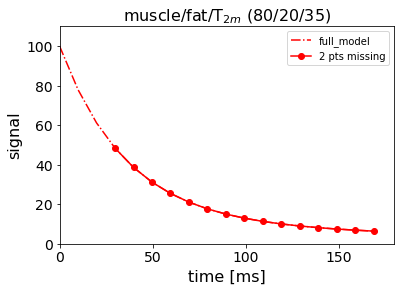

In [7]:
plt.plot( xxx0, full_model, 'r-.', label='full_model');
plt.plot( xxx, full_model_2pts_missing, 'ro-', label = '2 pts missing');
plt.xlim(0,180);
plt.ylim(0,110);
plt.title(title, fontsize=16)
plt.xlabel("time [ms]", fontsize=16);
plt.ylabel("signal", fontsize=16);
plt.legend();

In [8]:
ppp = lmfit.Parameters()

ppp.add_many(('A_f',   0, True,  0, 150, None),
             ('A_m',   Am, True,  0, 150, None),
             ('t2_m',  t2m,              True,  20, 60,  None),
             ('c_l',   0.55,              False, 0, 2000, None),
             ('c_s',   0.45,              False, 0, 2000, None),
             ('t2_fl', 250.0,             False, 0, 2000, None),
             ('t2_fs', 43.0,              False, 0, 2000, None)
              )

muscle_model = threeComponents(ppp, xxx)

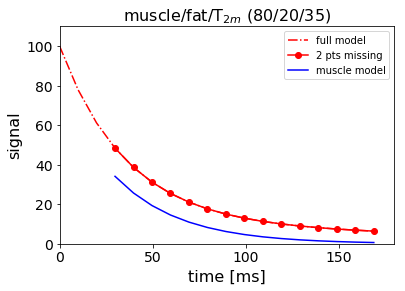

In [9]:
plt.plot( xxx0, full_model, 'r-.', label='full model');
plt.plot( xxx, full_model_2pts_missing, 'ro-', label='2 pts missing');
plt.plot( xxx, muscle_model, 'b-', label='muscle model');

plt.xlim(0,180);
plt.ylim(0,110);

plt.title(title, fontsize=16)
plt.xlabel("time [ms]", fontsize=16);
plt.ylabel("signal", fontsize=16);
plt.legend();

In [10]:
ppp = lmfit.Parameters()

ppp.add_many(('A_f',   Af, True,  0, 150, None),
             ('A_m',   0, True,  0, 150, None),
             ('t2_m',  t2m,              True,  20, 60,  None),
             ('c_l',   0.55,              False, 0, 2000, None),
             ('c_s',   0.45,              False, 0, 2000, None),
             ('t2_fl', 250.0,             False, 0, 2000, None),
             ('t2_fs', 43.0,              False, 0, 2000, None)
              )

fat_model = threeComponents(ppp, xxx)

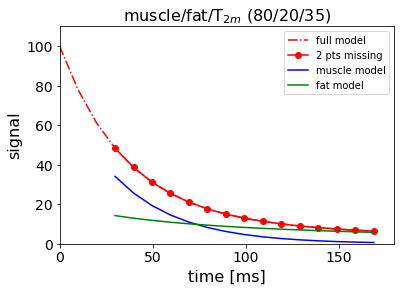

In [11]:
plt.plot( xxx0, full_model, 'r-.', label='full model');
plt.plot( xxx, full_model_2pts_missing, 'ro-', label='2 pts missing');
plt.plot( xxx, muscle_model, 'b-', label='muscle model');
plt.plot( xxx, fat_model, 'g-', label='fat model');


plt.xlim(0,180);
plt.ylim(0,110);

plt.title(title, fontsize=16)
plt.xlabel("time [ms]", fontsize=16);
plt.ylabel("signal", fontsize=16);
plt.legend();

In [12]:
ppp = lmfit.Parameters()

ppp.add_many(('A_f',   Af, True,  0, 150, None),
             ('A_m',   0, True,  0, 150, None),
             ('t2_m',  t2m,              True,  20, 60,  None),
             ('c_l',   0.55,              False, 0, 2000, None),
             ('c_s',   0.0,              False, 0, 2000, None),
             ('t2_fl', 250.0,             False, 0, 2000, None),
             ('t2_fs', 43.0,              False, 0, 2000, None)
              )

fat_long_model = threeComponents(ppp, xxx)

ppp.add_many(('A_f',   Af, True,  0, 150, None),
             ('A_m',   0, True,  0, 150, None),
             ('t2_m',  t2m,              True,  20, 60,  None),
             ('c_l',   0.0,              False, 0, 2000, None),
             ('c_s',   0.45,              False, 0, 2000, None),
             ('t2_fl', 250.0,             False, 0, 2000, None),
             ('t2_fs', 43.0,              False, 0, 2000, None)
              )

fat_short_model = threeComponents(ppp, xxx)

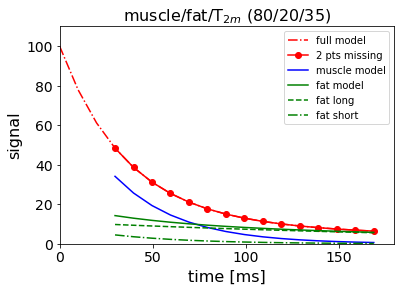

In [13]:
plt.plot( xxx0, full_model, 'r-.', label='full model');
plt.plot( xxx, full_model_2pts_missing, 'ro-', label='2 pts missing');
plt.plot( xxx, muscle_model, 'b-', label='muscle model');
plt.plot( xxx, fat_model, 'g-', label='fat model');
plt.plot( xxx, fat_long_model, 'g--', label='fat long');
plt.plot( xxx, fat_short_model, 'g-.', label='fat short');
plt.title(title, fontsize=16);
plt.xlabel("time [ms]", fontsize=16);
plt.ylabel("signal", fontsize=16);
plt.xlim(0,180);
plt.ylim(0,110);
plt.legend();


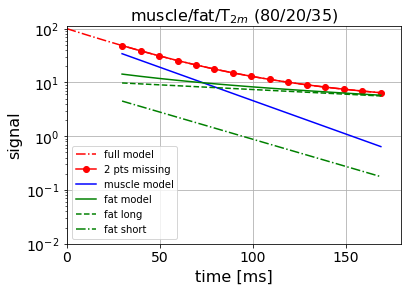

In [14]:
plt.semilogy( xxx0, full_model, 'r-.', label='full model');
plt.semilogy( xxx, full_model_2pts_missing, 'ro-', label='2 pts missing');
plt.semilogy( xxx, muscle_model, 'b-', label='muscle model');
plt.semilogy( xxx, fat_model, 'g-', label='fat model');
plt.semilogy( xxx, fat_long_model, 'g--', label='fat long');
plt.semilogy( xxx, fat_short_model, 'g-.', label='fat short');
plt.title(title, fontsize=16);
plt.xlabel("time [ms]", fontsize=16);
plt.ylabel("signal", fontsize=16);
plt.xlim(0,180);
plt.ylim(0.01,110);
plt.grid()
plt.legend();